### Student Details

Student name: Alessandro Gostoli

Student ID: 23251107

In [96]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement Logistic Regression 

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [97]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [98]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

#Extracting setosa and virginica, choosing everything besides versicolor
df = df.loc[df[' class']!='Iris-virginica']

#Extracting petal length and sepal length
X = df.iloc[:, [0,2]].values

#Extracting the class column mapping the two classes into 1 or 0 value
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)


In [99]:
################################
# Class stub for you to fill the rest of the code
import math

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            act = self.activation(output)
            errors = (act - y)
            m = len(X)
            cost = -(1/m) * sum(( y*np.log(act) + (1 - y) * np.log(1 - act) ))
            self.w_[1:] -= self.eta * X.T.dot(errors) / m
            self.w_[0] -= self.eta * errors.sum()
            self.cost_.append(cost)
        return self


    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1 / ( 1 + np.exp(np.clip(-z,-250,250)) )

    def predict(self, X):
        z = self.net_input(X)
        return np.where(self.activation(z) >= 0.5, 1, 0)

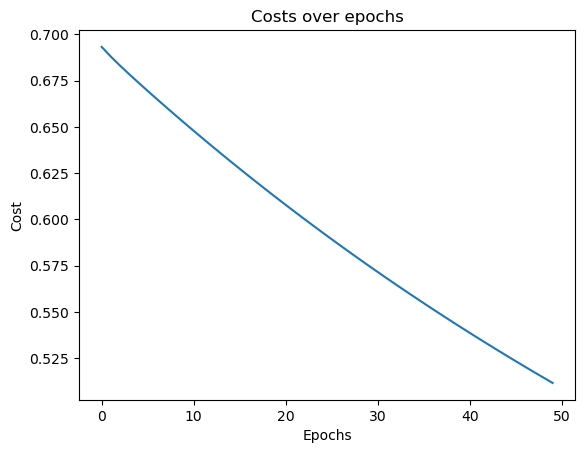

In [100]:
#Defining the model and plotting the cost per epoch 
log_reg = LogisticRegressionGD()
log_reg.train(X, y)

plt.plot(log_reg.cost_)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Costs over epochs")
plt.show()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

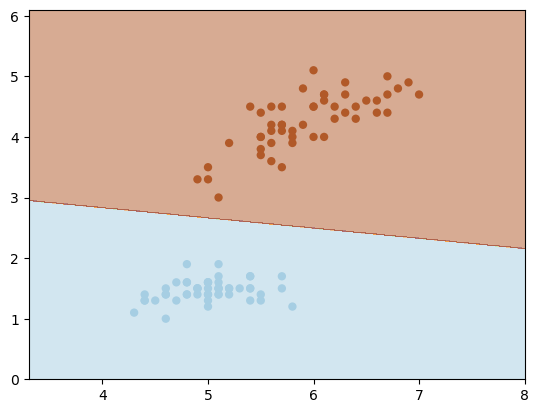

In [101]:
#Plotting the decision boundaries

from plot_decision_boundary import plot_decision_boundary

plot_decision_boundary(X, y, log_reg)


# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [102]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('iris_data.csv', header=0)

#droping sepal length and with to just have petal length and width
df = df.drop(["sepal_length", " sepa_width"], axis=1)

#replacing each class with its number representation
df[' class'] = df[' class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#Defining X and y
y = df.iloc[:,-1].values
X = df.drop([" class"], axis=1).values


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) 


In [104]:
from sklearn.preprocessing import StandardScaler

#Using the standard scaler to normalize the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


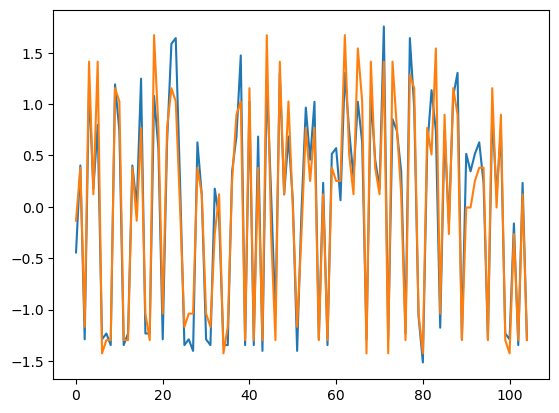

In [105]:
#Plotting scaled training data
plt.plot(scaled_X_train)
plt.show()

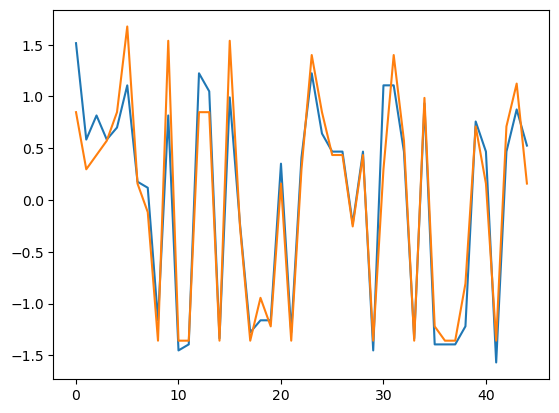

In [106]:
#Plotting scaled test data

plt.plot(scaled_X_test)
plt.show()

In [107]:
from sklearn.linear_model import LogisticRegression

#Defining and training Logistic regression model from sklearn
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

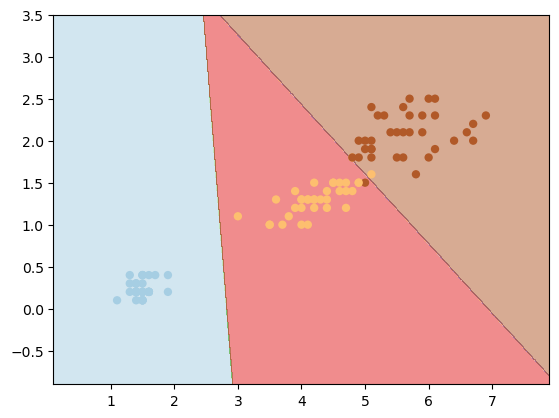

In [108]:
from plot_decision_boundary import plot_decision_boundary

#Plotting decision boundaries
plot_decision_boundary(X_train, y_train, log_reg)

In [109]:
from sklearn.metrics import accuracy_score

#Getting the accuracy score of model's prediction
y_pred = log_reg.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.9333333333333333


# Logistic regression with C = 0.01

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

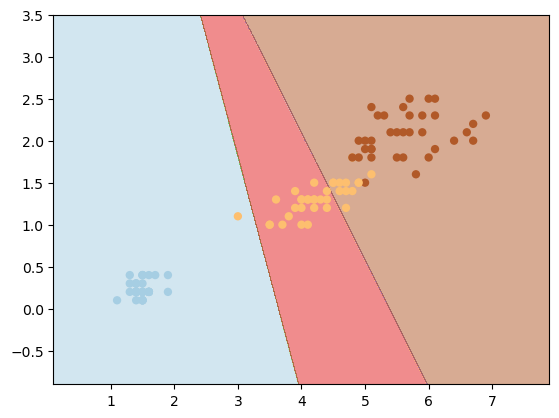

In [110]:
#Trying different C values. Here 0.01 
log_reg_low_c = LogisticRegression(C=0.01)
log_reg_low_c.fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, log_reg_low_c)

# Logistic regression with C = 100

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

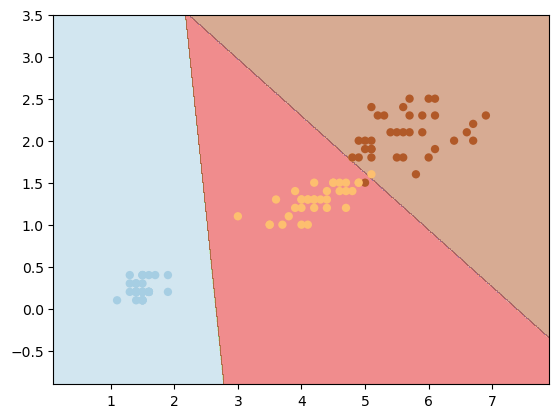

In [111]:
#Trying different C value. Here 100

log_reg_low_c = LogisticRegression(C=100)
log_reg_low_c.fit(X_train,y_train)
plot_decision_boundary(X_train, y_train, log_reg_low_c)

Regularization is one of the ways we can use to avoid overfitting. Regularization is controlled by $\lambda$ in Logistic regression while in support vector machine this parameter is C. In logistic regression, we have two members in the cost function. The second one is a kind of penalty/noise that we want to apply in the training process to avoid the model overfitting the training data. This second member is multiplied by $\lambda$ which controls how much noise we want to add. With small $\lambda$ we have low bias and high variance which means good performance in training data and bad ones in test data, which is overfitting. On the other hand, big $\lambda$ is underfitting: high bias and low variance. In support vector machines we use C which multiplies the first member of the cost function. However, C is equal to 1/$\lambda$, so they are inversely proportional. In fact in my plots when i used C = 0.01 we can see that the decision boundary has high bias and low variance, the same as using a big lambda. In contrast, C = 100 doesn't allow the decision boundary to misclassify many training data, giving us overfitting.

<span style="color:red">Insert your text answers below</span>.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels 
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

The first 2 steps of this task where the same as the second task so i just copied and paste. I also could have avoided to have this code twice but i did it anyway to have every task complete and able to work by its own

In [112]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('iris_data.csv', header=0)

#droping sepal length and with to just have petal length and width
df = df.drop(["sepal_length", " sepa_width"], axis=1)

#replacing each class with its number representation
df[' class'] = df[' class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#Defining X and y
y = df.iloc[:,-1].values
X = df.drop([" class"], axis=1).values


In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y) 


In [114]:
from sklearn.preprocessing import StandardScaler

#Using the standard scaler to normalize the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [123]:
print(scaled_X_train)

[[-0.44283471 -0.13515309]
 [ 0.40257701  0.38088597]
 [-1.28824644 -1.1672312 ]
 [ 1.19162795  1.41296408]
 [ 0.17713389  0.12286644]
 [ 0.79710248  1.41296408]
 [-1.28824644 -1.42525073]
 [-1.23188566 -1.29624096]
 [-1.34460722 -1.29624096]
 [ 1.19162795  1.15494455]
 [ 0.7407417   1.02593479]
 [-1.34460722 -1.29624096]
 [-1.23188566 -1.29624096]
 [ 0.40257701  0.38088597]
 [ 0.00805154 -0.13515309]
 [ 1.24798874  0.76791526]
 [-1.23188566 -1.03822143]
 [-1.23188566 -1.29624096]
 [ 1.07890639  1.67098361]
 [ 0.57165936  0.76791526]
 [-1.28824644 -1.03822143]
 [ 0.62802014  0.76791526]
 [ 1.58615343  1.15494455]
 [ 1.64251421  1.02593479]
 [ 0.23349467 -0.00614332]
 [-1.34460722 -1.1672312 ]
 [-1.28824644 -1.03822143]
 [-1.400968   -1.03822143]
 [ 0.62802014  0.38088597]
 [ 0.1207731   0.12286644]
 [-1.28824644 -1.03822143]
 [-1.34460722 -1.1672312 ]
 [ 0.17713389 -0.26416285]
 [-0.10467002  0.12286644]
 [-1.34460722 -1.42525073]
 [-1.34460722 -1.1672312 ]
 [ 0.34621623  0.25187621]
 

In [124]:
print(scaled_X_test)

[[ 1.51460381  0.84857614]
 [ 0.58413048  0.29715482]
 [ 0.81674881  0.43501015]
 [ 0.58413048  0.57286548]
 [ 0.70043965  0.84857614]
 [ 1.10752173  1.67570811]
 [ 0.1770484   0.15929949]
 [ 0.11889381 -0.11641117]
 [-1.16050702 -1.35710913]
 [ 0.81674881  1.53785278]
 [-1.45127993 -1.35710913]
 [-1.39312535 -1.35710913]
 [ 1.2238309   0.84857614]
 [ 1.04936715  0.84857614]
 [-1.33497077 -1.35710913]
 [ 0.99121256  1.53785278]
 [-0.23003368 -0.2542665 ]
 [-1.27681618 -1.35710913]
 [-1.16050702 -0.94354314]
 [-1.16050702 -1.2192538 ]
 [ 0.35151215  0.15929949]
 [-1.27681618 -1.35710913]
 [ 0.40966673  0.29715482]
 [ 1.2238309   1.39999745]
 [ 0.64228506  0.84857614]
 [ 0.46782131  0.43501015]
 [ 0.46782131  0.43501015]
 [-0.23003368 -0.2542665 ]
 [ 0.46782131  0.43501015]
 [-1.45127993 -1.35710913]
 [ 1.10752173  0.29715482]
 [ 1.10752173  1.39999745]
 [ 0.46782131  0.57286548]
 [-1.33497077 -1.35710913]
 [ 0.93305798  0.98643147]
 [-1.39312535 -1.2192538 ]
 [-1.39312535 -1.35710913]
 

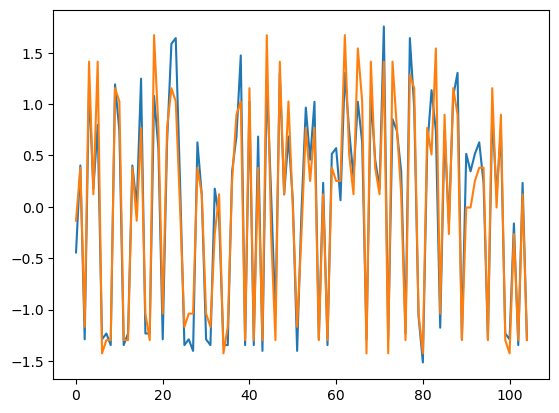

In [115]:
#Plotting scaled training data
plt.plot(scaled_X_train)
plt.show()

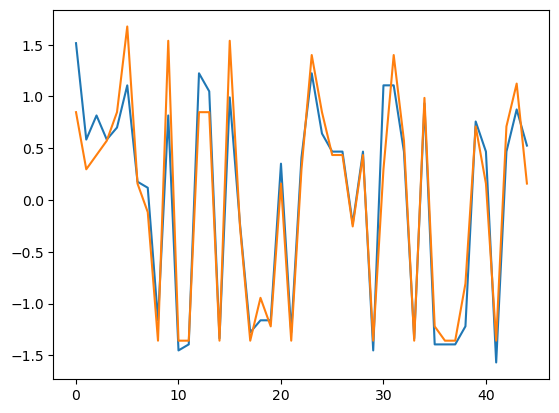

In [116]:
#Plotting scaled test data

plt.plot(scaled_X_test)
plt.show()

In [117]:
from sklearn.svm import SVC

#Defining and training the support vector classifier 
svc_model = SVC(kernel='linear')

svc_model.fit(X_train,y_train)

SVC(kernel='linear')

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

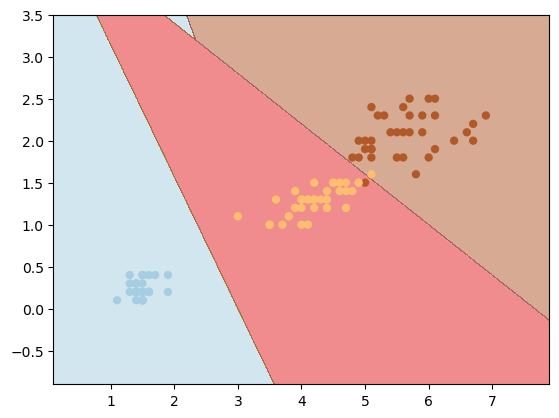

In [118]:
from plot_decision_boundary import plot_decision_boundary

#Plotting the decision boundaries
plot_decision_boundary(X_train, y_train, svc_model)

In [119]:
from sklearn.metrics import accuracy_score

#Getting the accuracy of the support vector classifier's predictions
y_pred = svc_model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

print(acc_score)

0.9333333333333333


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution 

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function 

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

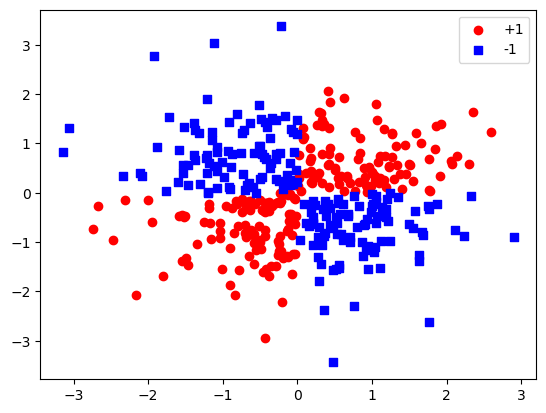

In [120]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

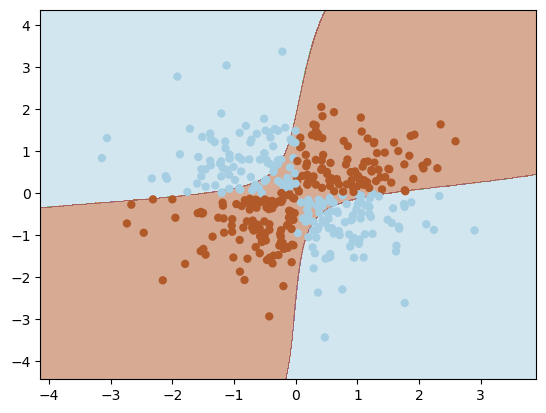

In [121]:
#Defining a support vector classifier with gamma value = 0.1
svm_model = SVC(kernel='rbf',gamma=0.1)
svm_model.fit(X_r, y_r)

#Plotting decision boundaries
plot_decision_boundary(X_r, y_r, svm_model)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

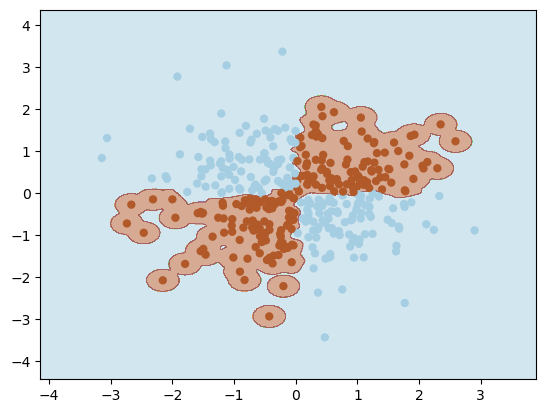

In [122]:
#Defining a support vector classifier with gamma value = 100
svm_model = SVC(kernel='rbf',gamma=100)
svm_model.fit(X_r, y_r)

#Plotting decision boundaries
plot_decision_boundary(X_r, y_r, svm_model)

Gamma in Gaussian kernel is defined as $\gamma = \frac{1}{2\sigma^2}$. $\sigma^2$ is the parameter that controls how rapidly the values of the similarity function decrease moving away from the peak of the function. Gamma and $\sigma^2$ are then inversely proportional. This means that small gamma (big $\sigma^2$) results in a "wide hills" similarity function which allows the model to not overfit and allow some misclassification. On the other hand, big gamma (small $\sigma^2$) means that decision boundaries are more sensitive to individual data points. This can sometimes lead to overfitting and capturing some noise and outliers. To summarize small gamma leads to less complexity in our plots while big gamma leads to very strict boundaries.

When we use C = 100 the model is overfitted to the training data, so it won't perform well with test data.